In [1]:
import pandas as pd
import gzip 
import os
import pickle

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
product_review_data = pd.read_pickle('/content/drive/MyDrive/Project/Amazon_Review_Data/reviews_Electronics_5.pkl')

In [6]:
product_meta_data = pd.read_pickle('/content/drive/MyDrive/Project/Amazon_Review_Data/meta_Digital_Cameras.pkl')

In [9]:
product_data = pd.merge(product_review_data, product_meta_data, on="asin")

In [12]:
# These are the total reviews we have for Electronics category

product_review_data.asin.nunique()

63001

In [13]:
# These are the total number of products in digital camera category

product_meta_data.asin.nunique()

9082

In [14]:
# These are the unique number of digital camera products for which we have reviews data
product_data.asin.nunique()

1064

In [15]:
product_data.shape

(30245, 27)

In [16]:
product_data.reviewText.nunique()

27383

In [17]:
product_data = product_data.drop_duplicates(subset=['reviewText'])

In [18]:
product_data.shape

(27383, 27)

In [20]:
product_data.isnull().sum()

reviewerID           0
asin                 0
reviewerName       219
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
imageURL             0
imageURLHighRes      0
details              0
dtype: int64

Text(0, 0.5, 'Number of Reviews')

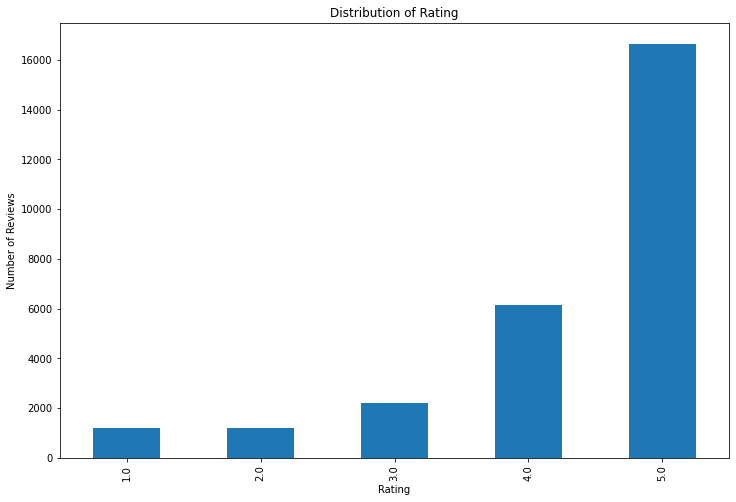

In [23]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,8))
product_data['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# **Explore Digital Camera Reviews**

In [50]:
product_data['reviewText'][1266]

"I bought this camera at Target about 3 months ago and am really impressed with the picture quality. The resolution is 1792 by 1200 pixels and looks great. The only thing i don't like about it is that it takes about 5 seconds to process the photo before you can take another one. The small screen is also terrible to see in the sun so you have to use the regular viewer. But overall, for a nice camera to take ordinary photos, its a winner."

In [ ]:
##########################################
## Split 'helpful' column into 'pos_helpful' and 'neg_helpful' and drop it at the end
##########################################

list_positive = []
list_negative = []

for help in product_data['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
product_data['pos_helpful'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
product_data['neg_helpful'] = list_negative

# Drop redundant 'helpful' column
product_data = product_data.drop('helpful', axis = 1)
product_data.head()

In [53]:
product_data = product_data.rename(columns={'overall': 'Rating'})

In [54]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(product_data[product_data['Rating'] >= 3])
bad_rate = len(product_data[product_data['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Digital Cameras'.format(good_rate))
print ('Bad ratings : {} reviews for Digital Cameras'.format(bad_rate))

Good ratings : 24977 reviews for Digital Cameras
Bad ratings : 2406 reviews for Digital Cameras


In [ ]:
##########################################
# Apply the new classification to the ratings column
##########################################
product_data['rating_class'] = product_data['Rating'].apply(lambda x: 'bad' if x < 3 else'good')

In [ ]:
##########################################
# Apply the helpfullness ratio
##########################################
product_data['help_prop'] = product_data.pos_helpful.div((product_data.pos_helpful+product_data.neg_helpful), axis=0)

In [ ]:
##########################################
# filling helpfullness ratio NAN value with zero
##########################################

product_data['help_prop'].fillna(0, inplace=True)

In [57]:
##########################################
# Convert time object to datetime and create a new column named 'time'
##########################################
product_data['Date_of_review'] = product_data.reviewTime.str.replace(',', "")
product_data['Date_of_review'] = pd.to_datetime(product_data['Date_of_review'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
product_data = product_data.drop('reviewTime', axis = 1)

In [ ]:
# Rename the columns
product_data.columns = ['Reviewer_Id','Product_Id','Reviewer_Name','Product_Review','Rating','Review_Summary','Unix_Review_Time','Product_Category', 'Tech1','Product_Description','Fit','Product_Title','Also_Buy', 'Tech2','Brand_Name', 'Feature', 'Rank', 'Also_View', 'Main_Category', 'Similar_Item', 'Date', 'Price', 'Image_URL', 'Image_URL_High_Res', 'Details', 'Helpful_Yes', 'Helpful_No', 'Rating_Class', 'Helpfulness_Proportion', 'Review_Date']


In [62]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(product_data)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(product_data.Reviewer_Id.unique()))
reviewer_prop = float(len(product_data.Reviewer_Id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(product_data.Product_Id.unique()))
product_prop = float(len(product_data.Product_Id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_data.Rating.mean(),3))

### Average helpful ratio
print ("Average helpfullness ratio score: ",round(product_data.Helpfulness_Proportion.mean(),3))


print ("================================================")

Number of reviews:  27383

Number of unique reviewers:  20806
Prop of unique reviewers:  0.76

Number of unique products:  1064
Prop of unique products:  0.039

Average rating score:  4.308
Average helpfullness ratio score:  0.605


In [ ]:
product_data.info()

In [64]:
product_data[['Rating','Helpful_Yes','Helpful_No','Helpfulness_Proportion']].describe()

,Rating,Helpful_Yes,Helpful_No,Helpfulness_Proportion
count,27383.000000,27383.000000,27383.000000,27383.000000
mean,4.308147,13.610634,2.262900,0.604538
std,1.079179,68.228661,9.204278,0.422451
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,5.000000,2.000000,0.000000,0.800000
75%,5.000000,8.000000,2.000000,1.000000
max,5.000000,4531.000000,387.000000,1.000000


In [66]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = product_data.groupby('Rating').size()
class_counts


Rating
1.0     1205
2.0     1201
3.0     2193
4.0     6136
5.0    16648
dtype: int64

In [78]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers: {}'.format(len(product_data['Reviewer_Id'].unique())))
      
# Number of unique products
print('\nNumber of unique products: {}'.format(len(product_data['Product_Id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_data)/len(product_data['Reviewer_Id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_data)/len(product_data['Product_Id'].unique()))))


Number of unique customers: 20806

Number of unique products: 1064

Review per customer: 1.3161107372873209

Review per product: 25.735902255639097


In [68]:
product_data.to_csv('/content/drive/MyDrive/FB_MLE/Capstone/Model/product_data.csv', sep=',', encoding='utf-8', index = False)

In [135]:
product_data = product_data.reset_index(drop=True)


In [136]:
product_data_new = product_data.drop(['Reviewer_Id','Reviewer_Name','Unix_Review_Time','Product_Category', 'Tech1','Product_Description','Fit','Product_Title','Also_Buy', 'Tech2','Brand_Name', 'Feature', 'Rank', 'Also_View', 'Main_Category', 'Similar_Item', 'Date', 'Price', 'Image_URL', 'Image_URL_High_Res', 'Details',  'Rating_Class', 'Review_Date'], axis=1)

In [137]:
product_data_new.head()

,Product_Id,Product_Review,Rating,Review_Summary,Helpful_Yes,Helpful_No,Helpfulness_Proportion
0,B00000JBIA,It is absolutely useless. The pictures are gr...,1.0,This camera is HORRIBLE!,24,0,1.000000
1,B00000JBIA,I bought two of these for my kids and they are...,1.0,Just awful; avoid at all costs,5,0,1.000000
2,B00000JBIA,"I bought the Smile to have a handy, inexpensiv...",1.0,Not the best choice,47,0,1.000000
3,B00000JBIA,". STOP!!! . 1/ This camera is NOT 640x480, is ...",1.0,BE CAREFUL!!!,16,1,0.941176
4,B00000JBIA,"I'm on a small budget this summer, so I bought...",1.0,"Worse than I thought, but at that price...",28,14,0.666667


In [85]:
product_data_new.to_csv('/content/drive/MyDrive/FB_MLE/Capstone/Model/product_data_new.csv', sep=',', encoding='utf-8', index = False)

## **SimCSE Analysis**

In [ ]:
!pip install simcse

In [ ]:
from simcse import SimCSE
model = SimCSE("princeton-nlp/sup-simcse-bert-base-uncased")

In [ ]:
embeddings = model.encode("A woman is reading.")

In [ ]:
sentences_a = ['A woman is reading.', 'A man is playing a guitar.', 'A dog is barking.']
sentences_b = ['He plays guitar.', 'A woman is making a photo.']
similarities = model.similarity(sentences_a, sentences_b)
print(similarities)

In [ ]:
sentences = ['A woman is reading.', 'A man is playing a guitar.']
model.build_index(sentences)
results = model.search("He plays guitar.")
print(results)

In [150]:
print(product_data_new['Product_Review'][10])

print('\nProduct ID: {}'.format(product_data_new['Product_Id'][10]))
print('\nRating: {}'.format(product_data_new['Rating'][10]))
print('\nHelpfulness proportion: {}'.format(product_data_new['Helpfulness_Proportion'][10]))
print('\nSummary of Review: {}'.format(product_data_new['Review_Summary'][10]))


After reading every review we could find, we ventured for the first time into the digital photographic world purchasing the Olympus 340-R digital camera.  We were definitely not disappointed.After just a few days the  camera accompanied us to Ulaanbaatar, Mongolia and Seoul, S. Korea, while  we nervously left our Canon SLR at home.  The camera performed marvelously.  We found the optional 16MB flash memory card more than adequate for our  needs, as we easily downloaded photos each day into our laptop.We were  amazed at the quality of photos even in low light settings.  We took shots  at our conference including a multimedia presentation where surprisingly  the projected image on the screen was readable!  While staying in the  countryside in a traditional Mongolian &quot;ger&quot; (tent), we shot an  incredible photo of the predawn sky-- even the morning stars are clearly  distinguishable!Arriving home we were completely satisfied with the  photos shot at the low resolution setting when

In [157]:
print(product_data_new['Product_Review'][1812])

print('\nProduct ID: {}'.format(product_data_new['Product_Id'][1812]))
print('\nRating: {}'.format(product_data_new['Rating'][1812]))
print('\nHelpfulness proportion: {}'.format(product_data_new['Helpfulness_Proportion'][1812]))
print('\nSummary of Review: {}'.format(product_data_new['Review_Summary'][1812]))


I bought this camera for a friend of mine about to have a baby.  Well I opened it for them this weekend to show them how to use it etc..  I was HORRIBLY dissapointed.  The screen is the worst!  It appears to have about 4 pixels and has got the lowest refresh rate I've ever seen.  It's quite hard to see what you're taking a picture of, and you must stabilize and sit still for a moment before you can use it at all.The picture quality... Well I only have my own camera to compare it to.  The Elph SD100.. which has the same resolution as this camera.. so I expected the picture quality to be similar.  Not so!  The pictures just seem so lifeless compared to my other camera.  It also seems like it doesn't compensate for lighting as well.Construction seems cheap.. it weighs about as much as a plastic disposable camera.  I can not believe I wasted about $230 on this junk.  I bought it before it was released thinking it was the latest and greatest from HP.  Little did I know.. this camera was int

In [161]:
all_reviews = product_data_new['Product_Review'][10]
all_reviews_dup = product_data_new['Product_Review'][1812]

similarities = model.similarity(all_reviews, all_reviews_dup)



100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


In [159]:
print(similarities)

0.43802645802497864


In [166]:
list_reviews = []

for i in range(len(product_data_new)):
    list_reviews.append(product_data_new['Product_Review'][i])


In [ ]:
all_reviews_dup = product_data_new['Product_Review'][1812]

similarities = model.similarity(list_reviews, all_reviews_dup)

 41%|████      | 174/428 [1:14:15<1:48:14, 25.57s/it]